Support  vector machines are one of best machine learning algorithms. They really work relatively small datasets and they tend to eork well "out of the box", they do not require much optimization.

Steps:

1. Load the dataset.

2. Missing Data
   -- Identifying missing data
   -- Dealing with missing data

3. Downsampling data

4. Formatting the Data for SVMs
   -- Splitting data into dependent and independent variables.
   -- One-Hot-Encoding.
   -- Centering and scaling the data.

5. Building a preliminary SVM

6. Optimizing parameters with cross validation
  -- Using cross vaidation (CV) to find the best values for Gamma and Regularization.

7. Building, Evaluating and Interpreting the Final SVM






In [1]:
## Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA

In [2]:
## Loading the data

df = pd.read_csv(r"C:\DSP\Machine_Learning_projects\default of credit card clients.csv", header= 1)


In [3]:
df.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
## copy the  original data

df1= df.copy()

In [5]:
## In the df all the features are independent except "default payment next month" which is dependent, will rename this feature for ease

df1.rename({"default payment next month": "Default"}, axis= 1, inplace=True)

df1.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
df1.drop('ID', axis=1, inplace=True)
print(type(df1))  # Should output <class 'pandas.DataFrame'> and not 'NoneType'

df1.head()

<class 'pandas.core.frame.DataFrame'>


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [10]:
df1.dtypes

LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_0        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
Default      int64
dtype: object

In [11]:
df1.isnull().sum()    # checking no null values


LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64

In [12]:
df1.duplicated().sum() ### Duplicate rows count

35

In [13]:
df1.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
df1[df1.isnull().any(axis=1)]  ## rows with any missing values

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default


In [15]:
df1.info()  ## Overall basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [16]:
# Count occurrences of non-standard missing values for all columns
non_standard_missing = [' ', '', 'N/A', 'NULL', '-']
for value in non_standard_missing:
    print(f"Occurrences of '{value}':\n", (df1 == value).sum())


Occurrences of ' ':
 LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64
Occurrences of '':
 LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
Default      0
dtype: int64
Occurrences of 'N/A':
 LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2 

This research employed a binary variable.

-- default payment (Yes = 1, No = 0), as the response variable. 
This study reviewed the literature and used the following 23 variables as explanatory variables:
 Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 Gender (1 = male; 2 = female).
 Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 Marital status (1 = married; 2 = single; 3 = others).
 Age (year).

 --History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.
 
  The measurement scale for the repayment status is: 
  -1 = pay duly; 
  1 = payment delay for one month; 
  2 = payment delay for two months;
   . 
   . 
   .
   ; 
  8 = payment delay for eight months; 
  9 = payment delay for nine months and above.

  
 ---Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

Checking Unique values for some of imp columns

In [18]:
df['SEX'].unique()

array([2, 1], dtype=int64)

In [19]:
df['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

As 'Education' also contains 0,5 and 6. It is possible that 0 represents missing data and 5 and 6 tells categories that not mentioned in the specification, but this may be a guess.

same with 'Marriage' also

In [20]:
df['MARRIAGE'].unique()

array([1, 2, 3, 0], dtype=int64)

Handling Missing Data.

since we have 0 and other categories that not mentioned in the specification, 

let assume 0- as missing data
and lets check the how many rows belong to this category.

In [27]:
df1.loc[(df1['EDUCATION'] == 0) | (df1['MARRIAGE'] == 0)].shape[0]

68

As 68 rows are less than 1% of missing data outof 30000 records so, we will not consider this.

In [28]:
df1_no_missing = df1.loc[(df1['EDUCATION'] != 0) & (df1['MARRIAGE'] != 0)]

In [29]:
df1_no_missing.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [30]:
df1_no_missing['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6], dtype=int64)

In [31]:
df1_no_missing['MARRIAGE'].unique()

array([1, 2, 3], dtype=int64)

# Downsample the data

Support Vector Machines are great with small datasets, but not awesome with large ones, here this dataset, its not big enough to take long time to optimize with Cross-validation. So will downsample the data to those, customers who did not default and who default, to 1000 each.

In [32]:
len(df1_no_missing)

29932

In [35]:
df1_no_default = df1_no_missing[df1_no_missing['Default'] == 0 ]
df1_default = df1_no_missing[df1_no_missing['Default'] == 1]

In [37]:
len(df1_default)

6631

In [38]:
len(df1_no_default)

23301

As we see above, as it's imbalance data, we try to resample to 1000 records each.


In [39]:
df1_no_default_downsampled = resample(df1_no_default,
                                      replace= False, n_samples=1000,
                                      random_state= 42)

len(df1_no_default_downsampled)

1000

In [40]:
df1_default_downsampled = resample(df1_default,
                                      replace= False, n_samples=1000,
                                      random_state= 42)

len(df1_default_downsampled)

1000

Now let's merge this two dataframes into single dataframe.

In [41]:
df1_downsampled = pd.concat([df1_default_downsampled, df1_no_default_downsampled])

len(df1_downsampled)

2000

Split the data into dependent and independent variables

In [42]:
X = df1_downsampled.iloc[:,:-1]
y=df1_downsampled.iloc[:, -1]


In [46]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
19982,300000,2,1,1,47,3,2,2,2,2,...,5000,5000,5000,5000,0,0,0,0,0,0
19350,80000,2,2,2,36,2,0,0,-2,-2,...,0,0,0,0,1700,0,0,0,0,0
17057,30000,2,3,2,22,2,2,0,0,0,...,29047,29507,11609,11711,0,1687,1147,524,400,666
26996,80000,1,1,2,34,2,2,2,2,2,...,63827,64682,65614,67007,2800,3000,2500,2600,2600,2600
23621,210000,2,3,1,44,-2,-2,-2,-2,-2,...,17706,0,5646,14793,13462,17706,0,5646,14793,7376


In [47]:
y.head()

19982    1
19350    1
17057    1
26996    1
23621    1
Name: Default, dtype: int64

One-Hot Encoding to categorial features.

There are two ways for encoding.

-- ColumnTransformer()

-- get_dummies()

In [49]:
X_encoded = pd.get_dummies(X, columns= ['MARRIAGE', 
                                        'SEX',
                                        'EDUCATION',
                                        'PAY_0',
                                        'PAY_2',
                                        'PAY_3',
                                        'PAY_4',
                                        'PAY_5',
                                        'PAY_6'])

X_encoded.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
19982,300000,47,5000,5000,5000,5000,5000,5000,0,0,...,False,False,False,False,True,False,False,False,False,False
19350,80000,36,19671,20650,0,0,0,0,1700,0,...,False,True,False,False,False,False,False,False,False,False
17057,30000,22,29793,29008,29047,29507,11609,11711,0,1687,...,False,False,False,True,False,False,False,False,False,False
26996,80000,34,61231,62423,63827,64682,65614,67007,2800,3000,...,False,False,False,False,True,False,False,False,False,False
23621,210000,44,11771,13462,17706,0,5646,14793,13462,17706,...,False,True,False,False,False,False,False,False,False,False


Scaling the data

The Radial Basis Function (RBF) that using with SVM, assumes that the data is centered and scaled. i.e., each column should have a mean=0 and a standard deviation =1. So we need to do this to both the training and testing datasets.

Note:  We split the data into training and testing datasets and then scale them separately to avoid Data Leakage. Data Leakae occurs when information about the training dataset corrupts or influences the testing dataset.

Note: We don't scale the y_train, y_test as its '0 and 1' values. 

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state= 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


Building a Preliminary Suppor Vector Machine

In [52]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled , y_train  )

SVC(random_state=42)

c:\DSP\Machine_Learning_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


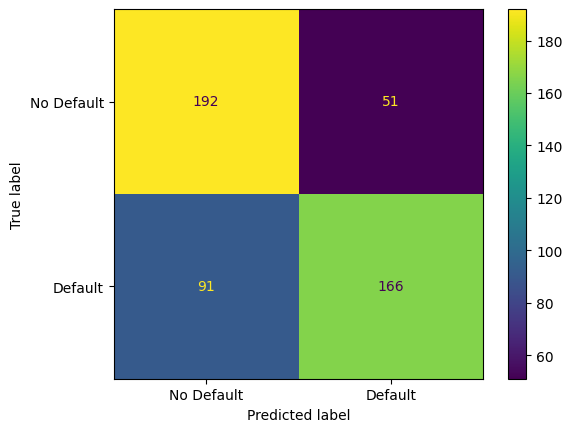

In [53]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled, y_test, 
                      display_labels=['No Default', 'Default'], 
                      values_format = 'd')


In the confusion matrix, out of 243 that 'no default', 192(80%) were correctly classified. And of the 257 that 'default', 166(64%) were correctly classified. FInally SVM was not that great. so let's try to improve preditions using Cross-validation to optimize the parameters.

Optimization Parameters with Cross-validation and GridSearchCV()

Optimizing a SVM is about to finding the best value for gamma, and potentially, the regularization parameter, C. So let's see if we can find parameters values using cross-validation in hope we can improve the accuracy with the testing dataset.

In [77]:
param_grid =  [
    { 'C': [0.5, 1, 10, 100],  ## C must be greater than 0
     'gamma': ['scale', 1, 0.1, 0.01, 0.001],
     'kernel':['rbf']}
]

optimal_params = GridSearchCV(SVC(), param_grid, cv=5, scoring= 'accuracy',verbose=0) ### Scoring parameters try other parameters 

optimal_params.fit(X_train_scaled, y_train)

print(optimal_params.best_params_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


Building final SVM with best Parameters got after Cross-validation

In [85]:
clf_svm= SVC(random_state=42, C=100, gamma= 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.001, random_state=42)

c:\DSP\Machine_Learning_projects\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


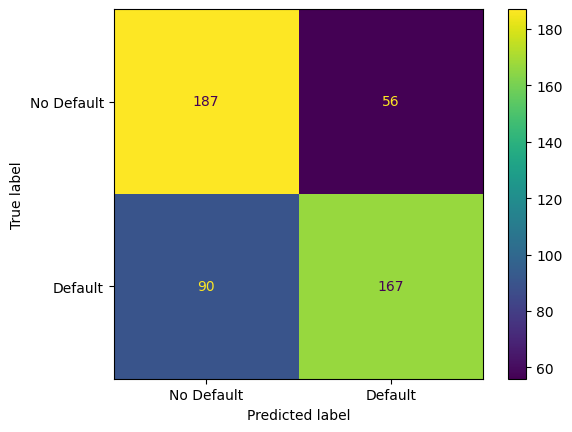

In [86]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled, y_test, values_format = 'd',
                      display_labels=['No Default', 'Default'], 
                      )


And the results after optimization SVM. it reduced 5 people as not defaulted and added 1 more person in as default.

The SVM was pretty good out of the box without much optiization. And its great for relatively small datasets.